#### 3.2 파이썬을 이용한 기술통계:다변량 데이터
- 다변량 데이터:여러 개의 변수를 조합한 데이터 ex.구두 판매액과 구두 색의 조합

##### 3.2.1 깔끔한 데이터
- 깔끔한 데이터:분석하기 쉽게 정리한 표 형태의 데이터
- 깔끔한 데이터의 특징
 > 1. 개별 값이 하나의 셀을 이룬다
 > 2. 개별 변수가 하나의 열을 이룬다
 > 3. 개별 관측이 하나의 행을 이룬다
 > 4. 개별 관측 유닛 유형이 하나의 표를 이룬다
- 깔끔한 데이터를 사용하면 복잡한 데이터를 모을 때 통일성 있는 처리를 할 수 있다

##### 3.2.2 지저분한 데이터
- 깔끔한 데이터가 아닌 데이터

##### 3.2.3 교차분석표
- 의미는 명확하지만 깔끔한 데이터는 아닌 형식의 데이터
- 분할표라고도 함
- 데이터를 분석할 때는 가능한 한 깔끔한 데이터가 되게 관리하고, 필요시 교차분석표로 변환해야하는 것이 좋다

##### 3.2.4 다변량 데이터 관리하기
- 깔끔한 데이터는 pandas의 데이터프레임으로 간단하게 관리할 수 있다.

In [32]:
import pandas as pd

In [33]:
fish_multi=pd.read_csv("3-2-1-fish_multi.csv")
print(fish_multi)

  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10


##### 3.2.5 그룹별 통계량 계산하기
- 데이터 그룹화:pandas의 groupby함수

In [34]:
group=fish_multi.groupby("species")
print(group.mean()) #그룹별 평균을 계산

         length
species        
A             3
B             8


In [35]:
print(group.std(ddof=1)) #그룹의 표준편차

         length
species        
A           1.0
B           2.0


In [36]:
group.describe() #평균이나 표준편차를 백분위 값으로 정리해서 출력

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

##### 3.2.6 교차분석표 구현하기
- 깔끔한 데이터를 교차분석표로 변환

In [37]:
shoes=pd.read_csv("3-2-2-shoes.csv")
print(shoes) #구두의 판매데이터 불러오기

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


- pandas의 pivot_table 함수 : 여러 가지 형태의 데이터 모음 확인

In [38]:
cross = pd.pivot_table(
    data = shoes, #데이터 지정
    values = "sales", #데이터를 모을 열 지정
    aggfunc = "sum", #데이터를 모을 함수 지정
    index = "store", #교차분석표의 행 지정
    columns = "color", #교차분석표의 열 지정
)
print(cross)

color  blue  red
store           
osaka    13    9
tokyo    10   15


##### 3.2.7 공분산
- 공분산:2개의 연속형 변수의 관계성을 확인하는 통계량
- Cov(x,y)   
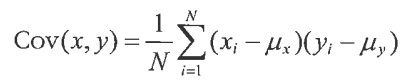

- 공분산의 조건들
 > 1. 공분산이 0보다 클 때:변수 한 쪽이 큰 값을 갖게 되면 다른 한 쪽도 커진다
 > 2. 공분산이 0보다 작을 때:변수 한 쪽이 큰 값을 갖게 되면 다른 한 쪽은 작아진다
 > 3. 공분산이 0일 때:변수 사이에 관계성이 없다
- ex.공분산의 결과가 0보다 큰 값일 때
 >변수 x가 평균보다 큰 값일 때 다른 변수 y도 평균보다 큰 값을 갖는다
- ex.공분산의 결과가 0보다 작은 값일 때
 >변수 x가 평균보다 큰 값일 때 다른 변수 y는 평균보다 작은 값을 갖는다

##### 3.2.8 분산-공분산 행렬
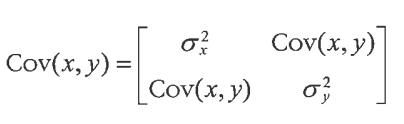

##### 3.2.9 공분산(실습)

In [39]:
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


In [40]:
#데이터 분리
x = cov_data["x"]
y = cov_data["y"]
#표본 크기
N = len(cov_data)
#평균값 계산
mu_x = np.mean(x)
mu_y = np.mean(y)

In [41]:
#공분산 계산
cov = sum((x-mu_x)*(y-mu_y)) / (N-1)
cov

7.673333333333336

##### 3.2.10 분산-공분산 행렬(실습)

In [42]:
np.cov(x,y,ddof=1)

array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

##### 3.2.11 피어슨 상관계수
- 그림
- 공분산을 최댓값1, 최솟값-1 사이가 되도록 표준화
- 공분산은 편리하지만 최댓값이나 최솟값이 얼마가 될지 알 수 없으므로 보정

##### 3.2.12 상관행렬
- 상관행렬:여러 변수의 상관계수들을 행렬 형태로 정리

##### 3.2.13 피어슨 상관계수(실습)

In [43]:
#분산 계산
sigma_2_x=np.var(x, ddof=1)
sigma_2_y=np.var(y, ddof=1)
#상관계수
rho = cov / np.sqrt(sigma_2_x*sigma_2_y)
rho

0.7592719041137088